In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon_Data.csv")

In [3]:
data = df.copy()

In [4]:
data.drop('Shipment', axis=1, inplace=True)

In [5]:
data.drop('Product Description', axis=1, inplace=True)

In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

In [7]:
data["Order Week"] = data["Order Date"].dt.dayofweek

In [8]:
data["Order Month"] = data["Order Date"].dt.month

In [9]:
data["Order Year"] = data["Order Date"].dt.year

In [10]:
data["Total Sales"] = data["Number of  reviews"] * data["Price(Dollar)"]

In [11]:
da = data.copy()

In [12]:
da.head()

,Product Category,Price(Dollar),Number of reviews,Order Date,Order Week,Order Month,Order Year,Total Sales
0,Audio Video,27,82773,2019-01-03,3,1,2019,2234871
1,Audio Video,54,5121,2019-01-04,4,1,2019,276534
2,Audio Video,24,126957,2019-01-04,4,1,2019,3046968
3,Audio Video,15,18837,2019-01-04,4,1,2019,282555
4,Audio Video,78,13141,2019-01-05,5,1,2019,1024998


In [17]:
da.to_csv("Process_Data.csv", index=False)

In [13]:
yearly_sales = da.groupby('Order Year')['Total Sales'].sum().reset_index()

Text(0, 0.5, 'Total Sales')

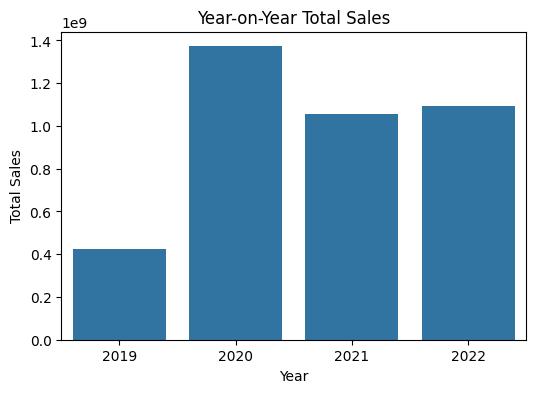

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(data=yearly_sales, x='Order Year', y='Total Sales')

plt.title('Year-on-Year Total Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

In [15]:
yearly_sales.to_csv("Yearly_sales.csv", index=False)